In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

from sim_utils import *
from simulation import *
from datetime import datetime

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### dirichlet X sage

In [5]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "dirichlet",
    "decoder_type": "sage",
    "decoder_estimate_interactions": True,
    "encoder_hidden_layers":[512,256],
    "decoder_hidden_layers":[256],
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):
    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    gtm_model_args["seed"] = i
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th simulation".format(i+1))
    print("  ")

with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

100%|██████████| 10000/10000 [01:50<00:00, 90.75it/s]


Epoch   1	Iter   10	Total Training Loss:2.5533109	Rec Loss:2.0433400	MMD Loss:0.5099514	Sparsity Loss:0.0000197	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:2.3821440	Rec Loss:2.0512173	MMD Loss:0.3309071	Sparsity Loss:0.0000196	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:2.4138753	Rec Loss:2.1047819	MMD Loss:0.3090737	Sparsity Loss:0.0000197	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:33.1842842	Rec Loss:34.1274490	MMD Loss:-0.9434826	Sparsity Loss:0.0003173	Pred Loss:0.0000000
Epoch   1	Training Loss:3.4876612
Epoch   2	Iter   10	Total Training Loss:2.0876143	Rec Loss:2.0320191	MMD Loss:0.0544250	Sparsity Loss:0.0011702	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:2.0815988	Rec Loss:2.0218239	MMD Loss:0.0586269	Sparsity Loss:0.0011480	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:2.1210263	Rec Loss:2.0837359	MMD Loss:0.0361493	Sparsity Loss:0.0011411	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss

100%|██████████| 10000/10000 [01:49<00:00, 91.13it/s]


Epoch   1	Iter   10	Total Training Loss:2.8064198	Rec Loss:2.0499644	MMD Loss:0.7564358	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:2.5812571	Rec Loss:2.0846016	MMD Loss:0.4966360	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:2.5116861	Rec Loss:2.0633900	MMD Loss:0.4482765	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:37.1500511	Rec Loss:31.3855553	MMD Loss:5.7641778	Sparsity Loss:0.0003148	Pred Loss:0.0000000
Epoch   1	Training Loss:3.7685738
Epoch   2	Iter   10	Total Training Loss:2.0999038	Rec Loss:2.0381238	MMD Loss:0.0606140	Sparsity Loss:0.0011661	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:2.0996437	Rec Loss:2.0722356	MMD Loss:0.0262635	Sparsity Loss:0.0011446	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:2.0458083	Rec Loss:2.0298109	MMD Loss:0.0148551	Sparsity Loss:0.0011422	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss:

100%|██████████| 10000/10000 [01:48<00:00, 92.01it/s]


Epoch   1	Iter   10	Total Training Loss:2.8473763	Rec Loss:2.0580955	MMD Loss:0.7892614	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:2.7592630	Rec Loss:2.0564761	MMD Loss:0.7027676	Sparsity Loss:0.0000194	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:2.7871690	Rec Loss:2.1007264	MMD Loss:0.6864232	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:42.0287209	Rec Loss:35.5906563	MMD Loss:6.4377513	Sparsity Loss:0.0003133	Pred Loss:0.0000000
Epoch   1	Training Loss:3.9834679
Epoch   2	Iter   10	Total Training Loss:2.1419466	Rec Loss:2.0698490	MMD Loss:0.0709323	Sparsity Loss:0.0011651	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:2.0681162	Rec Loss:2.0298715	MMD Loss:0.0371048	Sparsity Loss:0.0011398	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:2.1092043	Rec Loss:2.0376828	MMD Loss:0.0703878	Sparsity Loss:0.0011336	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss:

100%|██████████| 10000/10000 [01:49<00:00, 91.13it/s]


Epoch   1	Iter   10	Total Training Loss:3.0126090	Rec Loss:2.0935092	MMD Loss:0.9190802	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:2.5487425	Rec Loss:2.0778284	MMD Loss:0.4708949	Sparsity Loss:0.0000194	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:2.2853847	Rec Loss:2.0396605	MMD Loss:0.2457049	Sparsity Loss:0.0000194	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:36.3923225	Rec Loss:33.2668343	MMD Loss:3.1251752	Sparsity Loss:0.0003122	Pred Loss:0.0000000
Epoch   1	Training Loss:3.9230034
Epoch   2	Iter   10	Total Training Loss:2.1292357	Rec Loss:2.0295925	MMD Loss:0.0984903	Sparsity Loss:0.0011530	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:2.0573575	Rec Loss:2.0030165	MMD Loss:0.0532200	Sparsity Loss:0.0011211	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:2.0518510	Rec Loss:2.0257745	MMD Loss:0.0249667	Sparsity Loss:0.0011099	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss:

100%|██████████| 10000/10000 [05:41<00:00, 29.27it/s]  


Epoch   1	Iter   10	Total Training Loss:2.8748307	Rec Loss:2.0277045	MMD Loss:0.8471067	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:2.7703209	Rec Loss:2.0332448	MMD Loss:0.7370566	Sparsity Loss:0.0000195	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:2.8657758	Rec Loss:2.0663610	MMD Loss:0.7993953	Sparsity Loss:0.0000196	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:43.2047386	Rec Loss:32.0016708	MMD Loss:11.2027502	Sparsity Loss:0.0003152	Pred Loss:0.0000000
Epoch   1	Training Loss:4.1495283
Epoch   2	Iter   10	Total Training Loss:2.0501902	Rec Loss:2.0421903	MMD Loss:0.0068367	Sparsity Loss:0.0011633	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:2.0645831	Rec Loss:2.0231235	MMD Loss:0.0403225	Sparsity Loss:0.0011371	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:2.0664010	Rec Loss:2.0521114	MMD Loss:0.0131589	Sparsity Loss:0.0011309	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss

In [4]:
score_dict

{'cossim': [[0.7124394927946799,
   0.7446719814743781,
   0.6568402951285307,
   0.6934413794088314,
   0.525887931628702,
   0.7042543182942415,
   0.5401390323957348,
   0.772862611769225,
   0.7642508060458797,
   0.5830809656089191,
   0.6721673128559216,
   0.6937010481541583,
   0.6449078878965394,
   0.7606002642939159,
   0.4129718727312458,
   0.5125260163065257,
   0.49729630670626285,
   0.7412687738923184,
   0.7523175583682753,
   0.7567519252065016],
  [0.6543703433054808,
   0.7221705567705331,
   0.4142231605444289,
   0.6002372207537425,
   0.5780727474678564,
   0.5645748709861237,
   0.4454550687335967,
   0.4983827728544671,
   0.5244461264228526,
   0.6770954921747152,
   0.5221835486508678,
   0.664955138541147,
   0.6021734034205282,
   0.7250829856769513,
   0.4996150658388568,
   0.640148968942884,
   0.6311902007769449,
   0.6860126193046826,
   0.43519885522698504,
   0.5677720175871513],
  [0.603261057320597,
   0.4022658105512581,
   0.6159792497046159,
  

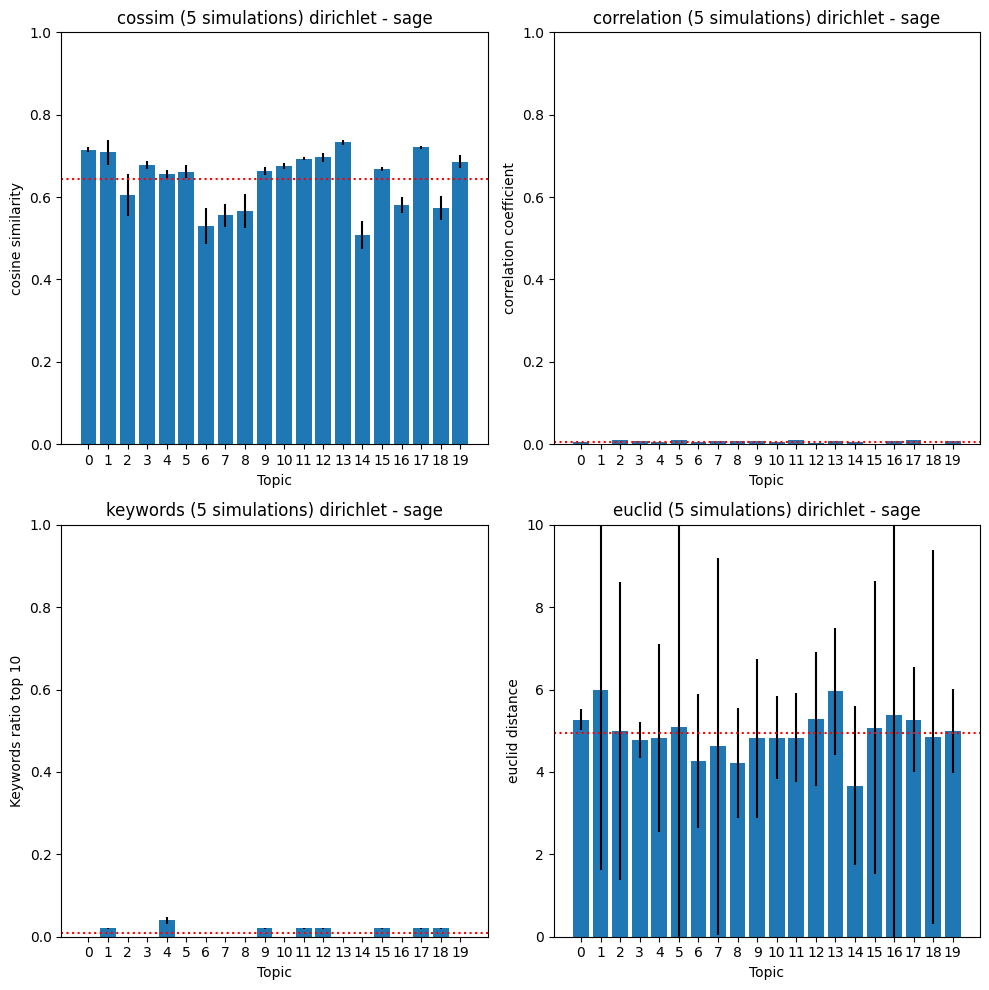

In [6]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()